94.5945945945946


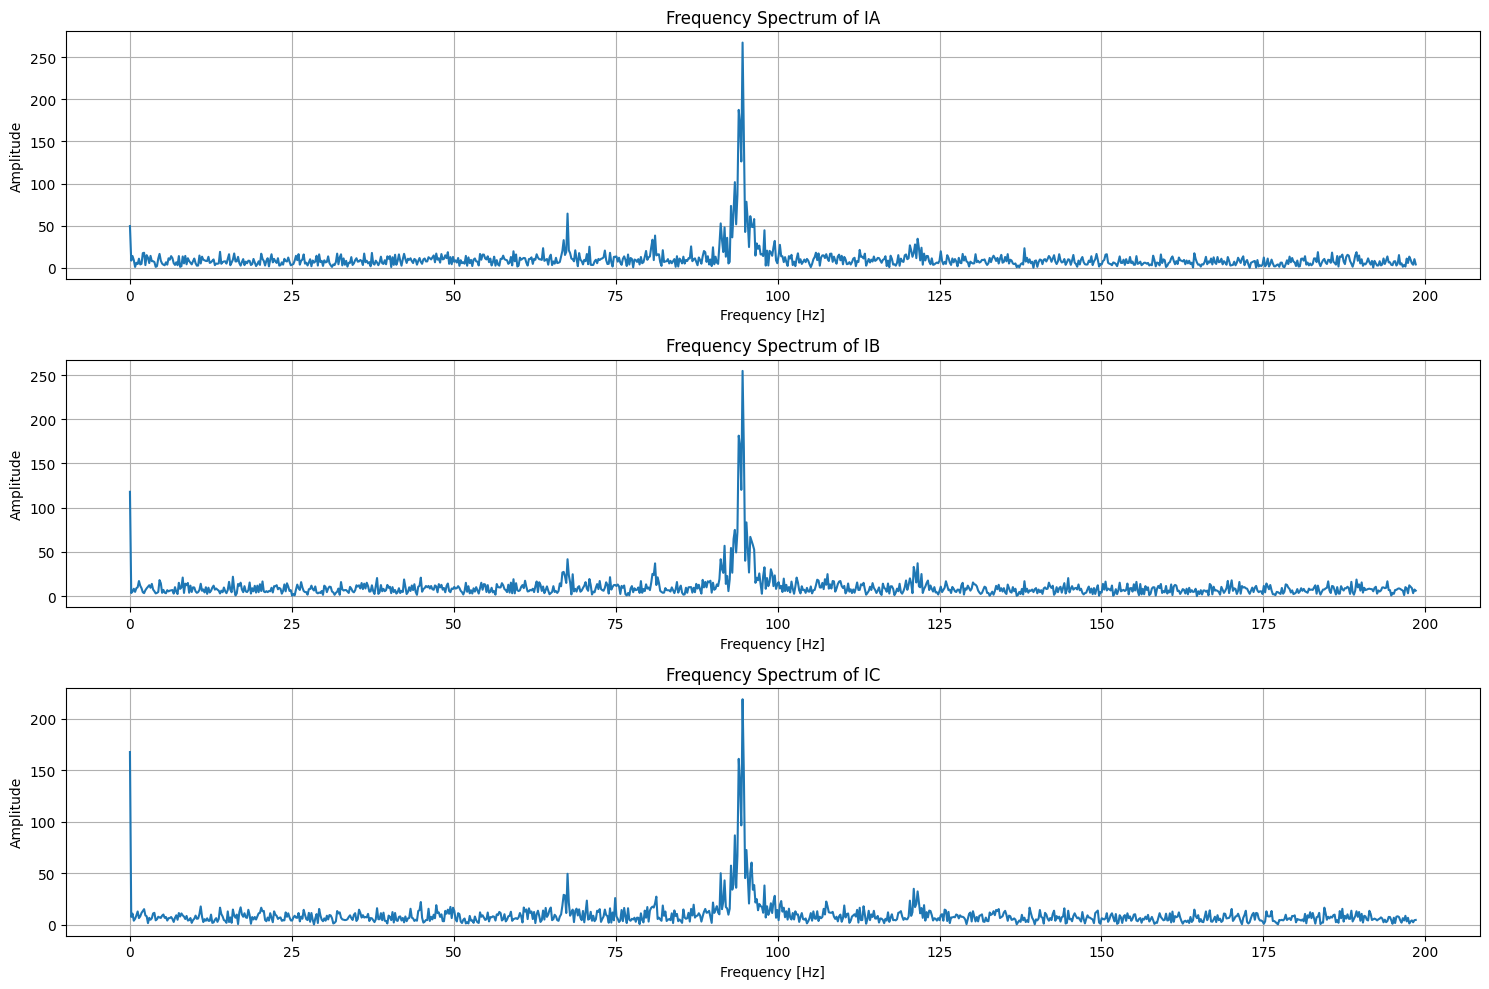

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSVファイルの読み込み
df = pd.read_csv('current.csv', header=None)  # ヘッダーなし
IA = df[1].values  # 1列目: IA
IB = df[2].values  # 2列目: IB
IC = df[3].values  # 3列目: IC

# サンプリング周波数（例: 1kHz）
fs = 1000  # サンプリング周波数[Hz]
n = len(IA)  # データ点数

# FFTを計算する関数
def compute_fft(signal, fs):
    n = len(signal)
    fft_result = np.fft.fft(signal)  # FFT計算
    freq = np.fft.fftfreq(n, d=1/fs)  # 周波数軸を生成
    amp_spectrum = np.abs(fft_result) * 2 / n  # 振幅スペクトル
    return freq[:n//2], amp_spectrum[:n//2]  # 正の周波数のみ返す

# IA, IB, ICのスペクトルを計算
freq_IA, amp_IA = compute_fft(IA, fs)
freq_IB, amp_IB = compute_fft(IB, fs)
freq_IC, amp_IC = compute_fft(IC, fs)

max_index = np.argmax(amp_IA)
print(freq_IA[max_index])

# グラフのプロット
plt.figure(figsize=(15, 10))

# IAのスペクトル
plt.subplot(3, 1, 1)
plt.plot(freq_IA[:1000], amp_IA[:1000])
plt.title('Frequency Spectrum of IA')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# IBのスペクトル
plt.subplot(3, 1, 2)
plt.plot(freq_IB[:1000], amp_IB[:1000])
plt.title('Frequency Spectrum of IB')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# ICのスペクトル
plt.subplot(3, 1, 3)
plt.plot(freq_IC[:1000], amp_IC[:1000])
plt.title('Frequency Spectrum of IC')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# グラフを表示
plt.tight_layout()
plt.show()

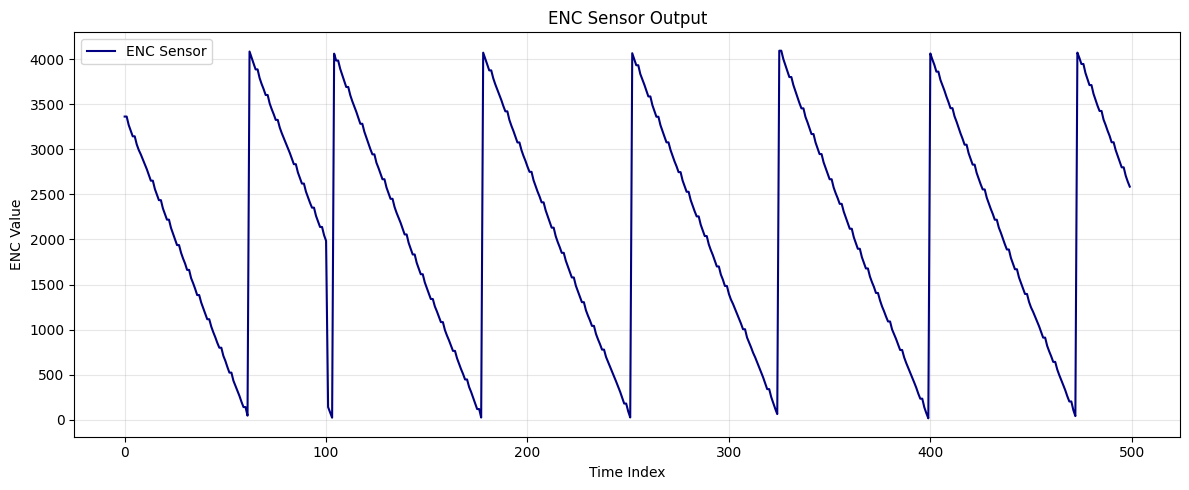

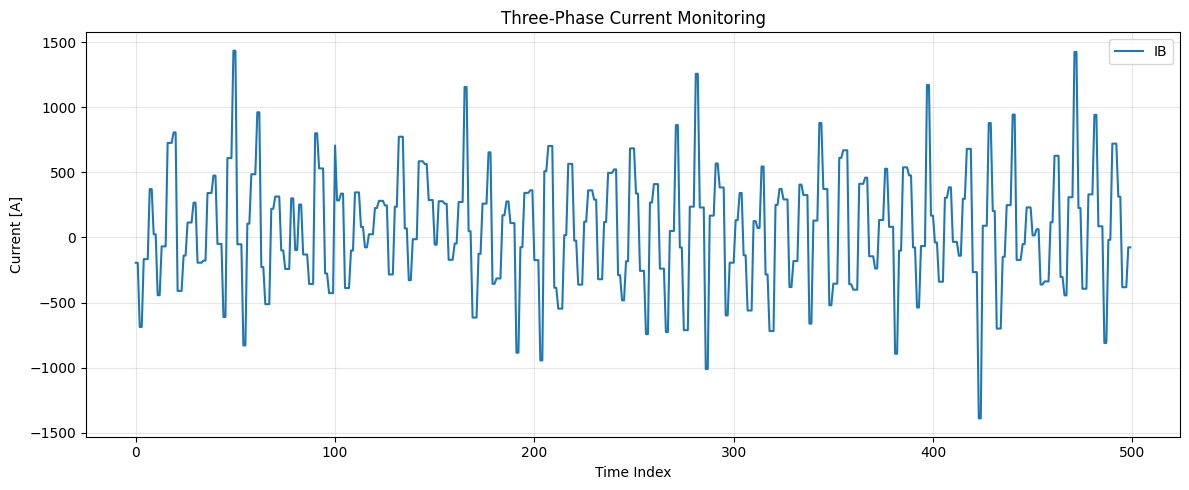

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV読み込み（4列構成）
data = pd.read_csv('current.csv', header=None, names=['ENC', 'IA', 'IB', 'IC'])

# ENCのプロット（1つ目のグラフ）
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['ENC'], color='navy', linestyle='-', label='ENC Sensor')
plt.xlabel('Time Index')
plt.ylabel('ENC Value')
plt.title('ENC Sensor Output')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('enc_output.png', dpi=300)
plt.show()

# 3相電流のプロット（2つ目のグラフ）
plt.figure(figsize=(12, 5))
#plt.plot(data.index, data['IA'], label='IA', marker='', linestyle='-')
plt.plot(data.index, data['IB'], label='IB', marker='', linestyle='-')
#plt.plot(data.index, data['IC'], label='IC', marker='', linestyle='-')
#plt.plot(data.index, data['IA'] + data['IB'] + data['IC'], label='I_SUM', marker='', linestyle='-')
plt.xlabel('Time Index')
plt.ylabel('Current [A]')
plt.title('Three-Phase Current Monitoring')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('current_output.png', dpi=300)
plt.show()

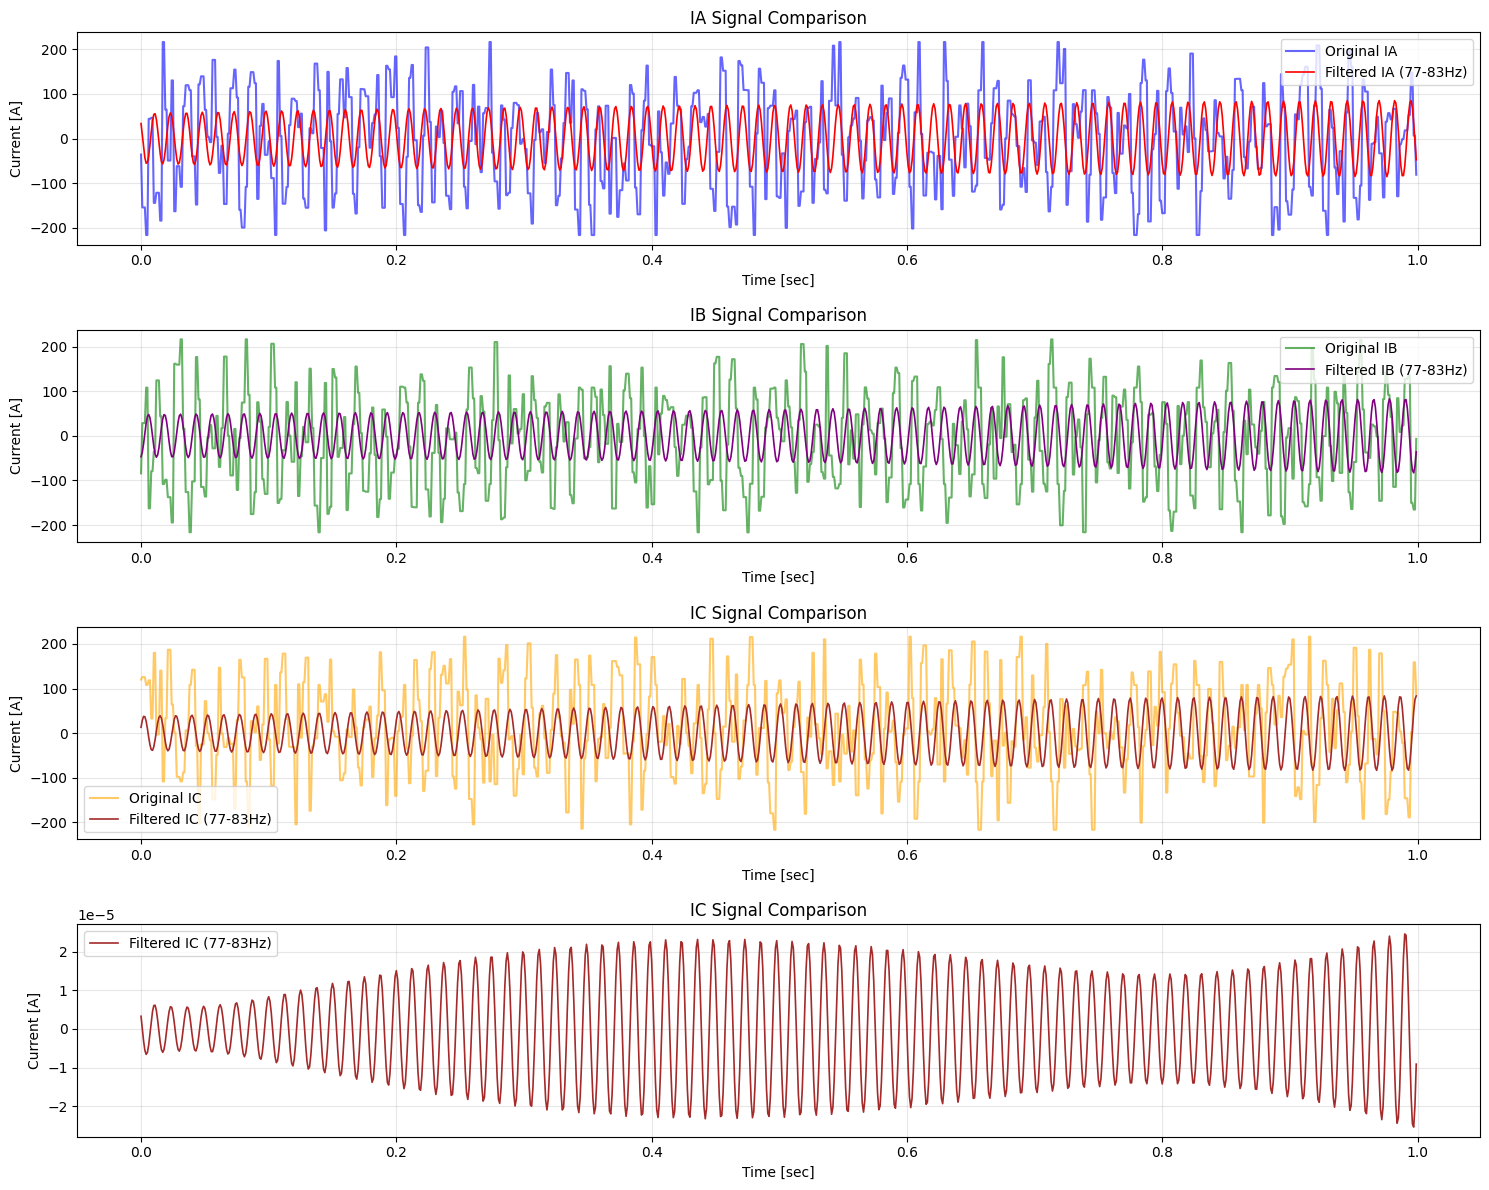

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSVファイル読み込みとデータ抽出
df = pd.read_csv('current.csv', header=None)
IA, IB, IC = df[1].values, df[2].values, df[3].values

# 信号処理パラメータ
fs = 1000  # サンプリング周波数
n = len(IA)
t = np.arange(n) / fs  # 時間軸を秒単位で生成

def bandpass_filter(signal, fs, lowcut, highcut):
    """周波数帯域フィルタリング関数"""
    fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(n, d=1/fs)
    mask = (np.abs(freq) < lowcut) | (np.abs(freq) > highcut)
    fft[mask] = 0
    return np.fft.ifft(fft).real

# 70-90Hz帯域でフィルタリング
filtered_IA = bandpass_filter(IA, fs, 80, 81)
filtered_IB = bandpass_filter(IB, fs, 80, 81)
filtered_IC = bandpass_filter(IC, fs, 80, 81)

# プロット設定
plt.figure(figsize=(15, 12))

# IAの比較プロット
plt.subplot(4, 1, 1)
plt.plot(t[:1000], IA[:1000], label='Original IA', alpha=0.6, color='blue')
plt.plot(t[:1000], filtered_IA[:1000], label='Filtered IA (77-83Hz)', color='red', linewidth=1.2)
plt.title('IA Signal Comparison', fontsize=12)
plt.xlabel('Time [sec]', fontsize=10)
plt.ylabel('Current [A]', fontsize=10)
#plt.xlim(0, t[-1])
plt.legend()
plt.grid(alpha=0.3)

# IBの比較プロット
plt.subplot(4, 1, 2)
plt.plot(t[:1000], IB[:1000], label='Original IB', alpha=0.6, color='green')
plt.plot(t[:1000], filtered_IB[:1000], label='Filtered IB (77-83Hz)', color='purple', linewidth=1.2)
plt.title('IB Signal Comparison', fontsize=12)
plt.xlabel('Time [sec]', fontsize=10)
plt.ylabel('Current [A]', fontsize=10)
#plt.xlim(0, t[-1])
plt.legend()
plt.grid(alpha=0.3)

# ICの比較プロット
plt.subplot(4, 1, 3)
plt.plot(t[:1000], IC[:1000], label='Original IC', alpha=0.6, color='orange')
plt.plot(t[:1000], filtered_IC[:1000], label='Filtered IC (77-83Hz)', color='brown', linewidth=1.2)
plt.title('IC Signal Comparison', fontsize=12)
plt.xlabel('Time [sec]', fontsize=10)
plt.ylabel('Current [A]', fontsize=10)
#plt.xlim(0, t[-1])
plt.legend()
plt.grid(alpha=0.3)

# 和のプロット
plt.subplot(4, 1, 4)
plt.plot(t[:1000], filtered_IA[:1000] + filtered_IB[:1000] + filtered_IC[:1000], label='Filtered IC (77-83Hz)', color='brown', linewidth=1.2)
plt.title('IC Signal Comparison', fontsize=12)
plt.xlabel('Time [sec]', fontsize=10)
plt.ylabel('Current [A]', fontsize=10)
#plt.xlim(0, t[-1])
plt.legend()
plt.grid(alpha=0.3)

# グラフ表示調整
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()